In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/DataScience/DataSet's/prestamos_records.csv")
df.shape

(8000, 7)

In [3]:
df_filter = df.fillna(0)
print(df_filter.shape)


(8000, 7)


In [4]:
df_filter.head()

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",0,NORTHERN CALIFORNIA,FALSO
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",0,ARIZONA,VERDADERO
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO


In [6]:
df_filter[(df_filter['MONTO_DEL_PRESTAMO']>=2500) & (df_filter['PRESTAMO_INCUMPLIDO'].str.contains("FALSO") & df_filter['UBICACION_DE_LA_OFICINA'].str.contains("SOUTHERN CALIFORNIA"))]

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO
7,01May2014:11:53:24.000000,10000,760-779,"$20,001-$30,000",0,SOUTHERN CALIFORNIA,FALSO
10,01May2014:12:52:26.000000,13000,720-739,"$10,001-$20,000",0,SOUTHERN CALIFORNIA,FALSO
14,01May2014:13:57:11.000000,5900,780-799,"$20,001-$30,000",0,SOUTHERN CALIFORNIA,FALSO
...,...,...,...,...,...,...,...
7946,06May2015:10:46:30.000000,5500,780-799,0,"Ingreso anual neto: $48,300",SOUTHERN CALIFORNIA,FALSO
7957,06May2015:14:32:30.000000,6700,760-779,"$100,000+",0,SOUTHERN CALIFORNIA,FALSO
7969,06May2015:18:25:17.000000,3200,740-759,0,El cliente no tiene deuda,SOUTHERN CALIFORNIA,FALSO
7995,07May2015:16:04:54.000000,3500,700-719,0,El cliente no tiene deuda...Ingreso anual neto...,SOUTHERN CALIFORNIA,FALSO


In [8]:
import random
def interes(MONTO_DEL_PRESTAMO):
  interes = MONTO_DEL_PRESTAMO * random.randint(1,3)
  return interes
df_filter["INTERES_DEL_PRESTAMO"] = df_filter["MONTO_DEL_PRESTAMO"].apply(interes)
df_filter.head()

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO,INTERES_DEL_PRESTAMO
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",0,NORTHERN CALIFORNIA,FALSO,2500
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO,5000
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",0,ARIZONA,VERDADERO,18900
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO,12900
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO,60300


In [10]:
group = df_filter.groupby("UBICACION_DE_LA_OFICINA").agg({
    "MONTO_DEL_PRESTAMO": "sum", 
    "INTERES_DEL_PRESTAMO": 'mean'
})
group.head()

,MONTO_DEL_PRESTAMO,INTERES_DEL_PRESTAMO
UBICACION_DE_LA_OFICINA,,
ARIZONA,10612900,13170.820481
NEVADA,6758500,12763.522618
NORTHERN CALIFORNIA,11324600,13297.084548
OREGON,4713900,12391.523179
SOUTHERN CALIFORNIA,13573600,13049.761450


<function matplotlib.pyplot.show>

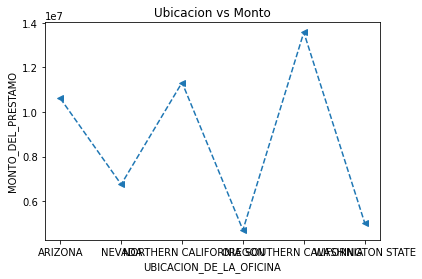

In [11]:
group["MONTO_DEL_PRESTAMO"].plot(marker='<', linestyle='--')
plt.ylabel('MONTO_DEL_PRESTAMO')
plt.title("Ubicacion vs Monto")
plt.show